In [2]:
#First prepare our data
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles 
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [4]:
#Make dataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
        "X2": X[:, 1],
        "label": y
        })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [5]:
# Check different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

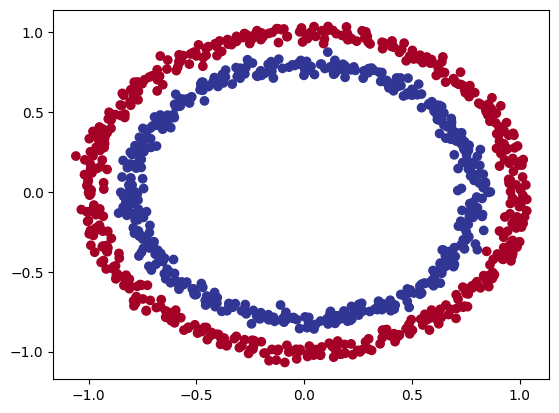

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sampe of X: {X_sample.shape} and the same for y: {y_sample.shape} ")

Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sampe of X: (2,) and the same for y: () 


In [9]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [11]:
from torch import nn

#Make device agnostic code
device = "cpu" if torch.backends.mps.is_available() else "cpu"
device

'cpu'

In [12]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linearlayers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features (layer_1), produces 1 feature (y)
        
    # 3. Define a forward method containing the forward pass computation
    # Return the output of layer_2 a s.ngle feature, the same shape as y
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then output of layer_1 goes to layer_2
    
    ''' Return function can also be defined like this
    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x
        '''
        
    # 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
# We could define the same model using nn.Sequential Sequantial performs forward pass in order they appear
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
# Make predictions without training
untrained_predictions = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_predictions)}, Shape: {untrained_predictions.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_predictions[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

untrained_sequential_predictions = model_1(X_test.to(device))
print(f"Length of predictions: {len(untrained_sequential_predictions)}, Shape: {untrained_sequential_predictions.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_sequential_predictions[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.1481],
        [-0.0435],
        [ 0.3967],
        [ 0.0787],
        [-0.0060],
        [-0.1198],
        [-0.3402],
        [-0.3591],
        [ 0.4133],
        [-0.0608]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.5416],
        [0.6154],
        [0.2484],
        [0.6251],
        [0.0903],
        [0.1366],
        [0.4698],
        [0.3573],
        [0.2556],
        [0.6186]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [15]:
# Create a loss fnuction
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = with sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [16]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred.sum().item()) # torch.eq() calculates where to tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [17]:
# View the first 5 ouputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1481],
        [-0.0435],
        [ 0.3967],
        [ 0.0787],
        [-0.0060]], grad_fn=<SliceBackward0>)

In [18]:
# Use the sigmoid function to get probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5369],
        [0.4891],
        [0.5979],
        [0.5197],
        [0.4985]], grad_fn=<SigmoidBackward0>)

In [19]:
# Find the predicted labels (round probabilities)
y_preds = torch.round(y_pred_probs)
# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 0., 1., 1., 0.], grad_fn=<SqueezeBackward0>)

In [20]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [21]:
# Building a training and testing loop

torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train() # Turn on training mode
    
    #1. Forward pass (model outputs raw logits  
    y_logits = model_0(X_train).squeeze() # squeeze removes extra dimension, this won't work unless model and data are on the same device)
    y_pred = torch.round(torch.sigmoid(y_logits)) # round to 0 or 1 turn logists into predictions
    
    #2. Calculate the loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), y_train) # BCELoss = no sigmoid built-in
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss = with sigmoid built-in
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Loss backward
    loss.backward()
    
    #5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_0.eval() # Turn on evaluation mode
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    # Print what's happenng every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.mean().item():.5f} | Accuracy: {acc.mean().item():.2f} | Test Loss: {test_loss.mean().item():.5f} | Test Acc: {test_acc.mean().item():.2f}")

Epoch: 0 | Loss: 0.70455 | Accuracy: 0.00 | Test Loss: 0.69623 | Test Acc: 0.00
Epoch: 10 | Loss: 0.70410 | Accuracy: 0.00 | Test Loss: 0.69598 | Test Acc: 0.00
Epoch: 20 | Loss: 0.70368 | Accuracy: 0.00 | Test Loss: 0.69574 | Test Acc: 0.00
Epoch: 30 | Loss: 0.70328 | Accuracy: 0.00 | Test Loss: 0.69552 | Test Acc: 0.00
Epoch: 40 | Loss: 0.70290 | Accuracy: 0.00 | Test Loss: 0.69532 | Test Acc: 0.00
Epoch: 50 | Loss: 0.70254 | Accuracy: 0.00 | Test Loss: 0.69513 | Test Acc: 0.00
Epoch: 60 | Loss: 0.70220 | Accuracy: 0.00 | Test Loss: 0.69495 | Test Acc: 0.00
Epoch: 70 | Loss: 0.70188 | Accuracy: 0.00 | Test Loss: 0.69479 | Test Acc: 0.00
Epoch: 80 | Loss: 0.70157 | Accuracy: 0.00 | Test Loss: 0.69464 | Test Acc: 0.00
Epoch: 90 | Loss: 0.70128 | Accuracy: 0.00 | Test Loss: 0.69450 | Test Acc: 0.00


In [22]:
# If helper_functions are not present uncomment the following section
'''# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)'''
    
# Import helper functions
from helper_functions import plot_predictions, plot_decision_boundary


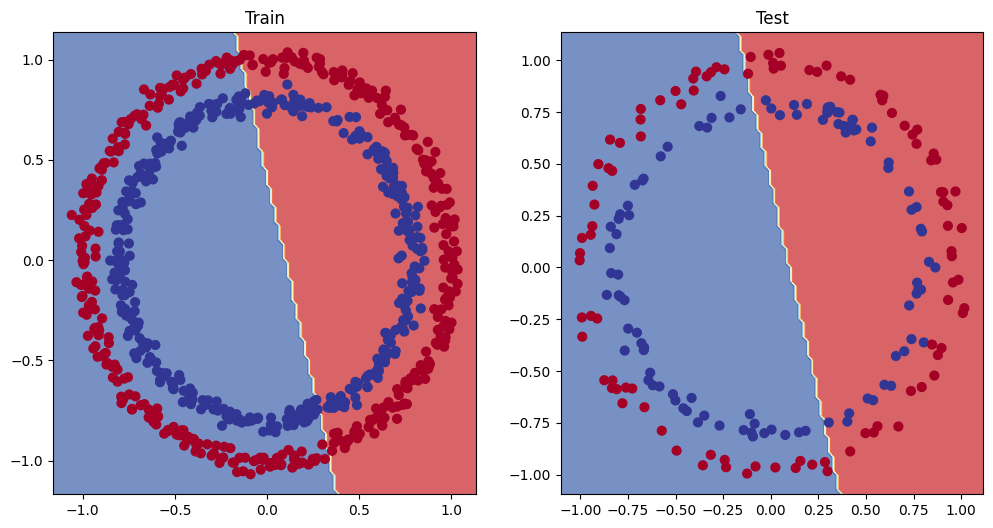

In [23]:
# Plot decision boundaries for training and test data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


In [26]:
# Let's try with a more complex model and more epochs

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # Extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self,x): 
        z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)
        return z
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)